<a href="https://colab.research.google.com/github/GabrielFCosta/RNAs/blob/main/matb05_projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Universidade Federal da Bahia 2022.2
#### MATB05 -- Tópicos em Inteligência Artificial
#### Aluno: Gabriel Gonçalves Faria Costa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import r_regression
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from numpy.random import seed
seed(0)
tf.random.set_seed(0)

## 1 - Carregamento da base de dados

dados originais em https://tempo.inmet.gov.br/TabelaEstacoes/A401

In [ ]:
# Lendo e concatenando arquivos da base de dados
urls = ['https://raw.githubusercontent.com/GabrielFCosta/preprocessamento/main/SALVADOR%20(A401)_2020-01-01_2020-06-31.csv',
        'https://raw.githubusercontent.com/GabrielFCosta/preprocessamento/main/SALVADOR%20(A401)_2020-07-01_2020-12-31.csv',
        'https://raw.githubusercontent.com/GabrielFCosta/preprocessamento/main/SALVADOR%20(A401)_2021-01-01_2021-06-30.csv',
        'https://raw.githubusercontent.com/GabrielFCosta/preprocessamento/main/SALVADOR%20(A401)_2021-07-01_2021-12-31.csv']

datasets = []
for url in urls:
  df = pd.read_csv(url, sep=';', decimal=',')
  datasets.append(df)
df = pd.concat(datasets)
df  = df.reset_index()
df = df.drop(columns=['index']).copy()
# base de dados original
df

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,01/01/2020,0,25.9,26.4,25.9,79.0,79.0,73.0,22.1,22.1,21.1,1006.3,1006.3,1005.9,1.4,52.0,5.0,NaN,0.0
1,01/01/2020,100,26.0,26.1,25.9,81.0,81.0,79.0,22.4,22.4,22.1,1007.0,1007.0,1006.3,1.7,54.0,4.8,NaN,0.0
2,01/01/2020,200,26.0,26.1,25.9,82.0,82.0,80.0,22.7,22.8,22.4,1006.9,1007.2,1006.9,1.3,38.0,4.8,NaN,0.0
3,01/01/2020,300,25.7,26.0,25.7,85.0,85.0,82.0,22.9,22.9,22.7,1006.3,1006.9,1006.3,1.0,40.0,4.0,NaN,0.0
4,01/01/2020,400,25.7,25.8,25.6,86.0,86.0,85.0,23.1,23.2,22.9,1005.2,1006.3,1005.2,1.4,34.0,3.7,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,31/12/2021,1900,28.9,29.5,28.8,65.0,66.0,62.0,21.6,22.0,21.2,1003.1,1003.4,1003.0,1.7,79.0,7.8,1898.3,0.0
17540,31/12/2021,2000,27.6,29.0,27.6,67.0,67.0,63.0,21.0,21.8,20.4,1003.3,1003.3,1003.0,1.4,56.0,6.4,862.7,0.0
17541,31/12/2021,2100,26.9,27.6,26.9,68.0,68.0,65.0,20.5,20.8,20.3,1003.8,1003.8,1003.3,1.9,57.0,7.8,122.3,0.0
17542,31/12/2021,2200,26.4,26.9,26.4,75.0,75.0,68.0,21.5,21.5,20.5,1004.9,1004.9,1003.8,1.5,62.0,6.1,NaN,0.0


Pré-processamento inicial:

Limpeza dos dados

In [ ]:
# Convertendo Data para datetime (opcional)
#df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
# Excluindo atributo Hora
df1 = df.drop(columns=['Hora (UTC)'])
df1.dtypes

Data                     object
Temp. Ins. (C)          float64
Temp. Max. (C)          float64
Temp. Min. (C)          float64
Umi. Ins. (%)           float64
Umi. Max. (%)           float64
Umi. Min. (%)           float64
Pto Orvalho Ins. (C)    float64
Pto Orvalho Max. (C)    float64
Pto Orvalho Min. (C)    float64
Pressao Ins. (hPa)      float64
Pressao Max. (hPa)      float64
Pressao Min. (hPa)      float64
Vel. Vento (m/s)        float64
Dir. Vento (m/s)        float64
Raj. Vento (m/s)        float64
Radiacao (KJ/m²)        float64
Chuva (mm)              float64
dtype: object

In [ ]:
# Verificando valores NaN
print(df1.isnull().sum())
# excluindo atributo Radiação
df2 = df1.drop(columns=['Radiacao (KJ/m²)'])
# preenchendo Temp. Max.faltante com média da coluna
medias = df2['Temp. Max. (C)'].mean()
df2.fillna(medias, inplace=True)

Data                       0
Temp. Ins. (C)             0
Temp. Max. (C)             1
Temp. Min. (C)             0
Umi. Ins. (%)              0
Umi. Max. (%)              0
Umi. Min. (%)              0
Pto Orvalho Ins. (C)       0
Pto Orvalho Max. (C)       0
Pto Orvalho Min. (C)       0
Pressao Ins. (hPa)         0
Pressao Max. (hPa)         0
Pressao Min. (hPa)         0
Vel. Vento (m/s)           0
Dir. Vento (m/s)           0
Raj. Vento (m/s)           0
Radiacao (KJ/m²)        8015
Chuva (mm)                 0
dtype: int64


In [ ]:
print(df2.isnull().sum())

Data                    0
Temp. Ins. (C)          0
Temp. Max. (C)          0
Temp. Min. (C)          0
Umi. Ins. (%)           0
Umi. Max. (%)           0
Umi. Min. (%)           0
Pto Orvalho Ins. (C)    0
Pto Orvalho Max. (C)    0
Pto Orvalho Min. (C)    0
Pressao Ins. (hPa)      0
Pressao Max. (hPa)      0
Pressao Min. (hPa)      0
Vel. Vento (m/s)        0
Dir. Vento (m/s)        0
Raj. Vento (m/s)        0
Chuva (mm)              0
dtype: int64


Funções utilizadas na etapa seguinte do pré-processamento:

Transformação dos dados

In [ ]:
# calcula frequências dos diferentes valores do atributo especificado por col
# adiciona nova coluna 'freq'
def frequencias(dataset,col):
  df = pd.DataFrame(columns=[col,'freq'])
  df[col] = dataset[col].copy()
  df['freq'] = dataset.groupby([col])[col].transform('count')
  return dataclean(df)

# Remove linhas duplicatas e atualiza index do dataframe
def dataclean(dataset):
  dataset.drop_duplicates(inplace = True)
  dataset = reset(dataset)
  return dataset
# reseta o index do dataframe
def reset(dataset):
  dataset  = dataset.reset_index()
  return dataset.drop(columns=['index'])

# calcula as médias diárias dos atributos e retorna dataframe
def medias(df):
  datas = frequencias(df,'Data')['Data'].tolist()
  df1 = pd.DataFrame(columns=df.columns)
  df1 = df1.drop(columns=['Data','Chuva (mm)'])
  index = 0
  for data in datas:
    aux = df.loc[df['Data'] == data, :]
    aux = aux.drop(columns=['Data','Chuva (mm)'])
    df1.loc[index] = aux.mean().round(2).tolist()
    index += 1
  return df1

# Calcula total de chuvas por dia e retorna lista
def chuvas(df):
  datas = frequencias(df,'Data')['Data'].tolist()
  totals =[]
  for data in datas:
    aux = df.loc[df['Data'] == data, :]
    aux = aux['Chuva (mm)']
    totals.append(aux.sum())
  return totals


## 2 - Primeira Abordagem
### Utilizando um modelo Perceptron de Múltiplas Camadas (MLP):
#### Obter uma estimativa aproximada do volume total de chuva em um dia com base nas médias diárias dos outros 15 atributos meteorológicos.

In [ ]:
# dados contém as médias diárias de todos atributos e o total diário de chuva
dados = medias(df2)
dados['Chuva (mm)'] = chuvas(df2)

Removendo outliers

In [ ]:
media = dados['Chuva (mm)'].mean()
dp = dados['Chuva (mm)'].std()
print("Média de chuva total diária: " + str(media))
print("Desvio Padrão: " + str(dp))
# Excluindo outliers: dias em que choveu mais de duas vezes o desvio + média
outliers = dp*2 + media
dados = dados[dados['Chuva (mm)'] < outliers]

Média de chuva total diária: 6.036114911080711
Desvio Padrão: 13.430535978367706


Definindo categorias com base no volume máximo de chuva após remoção de outliers

In [ ]:
# Criar classe a partir do total diário de chuva
# Valor máximo do atributo = 32.8 mm
dados['Chuva (mm)'].max()

32.8

In [ ]:
# Definir 17 intervalos de 2 mm. Primeiro intervalo será 0 - 2 mm... até +32mm
def categoria(df):
  cats = []
  for idx, i in df.iterrows():
    if i['Chuva (mm)'] <= 2:
      cats.append(20)
    elif i['Chuva (mm)'] <= 4:
      cats.append(0)
    elif i['Chuva (mm)'] <= 6:
      cats.append(1)
    elif i['Chuva (mm)'] <= 8:
      cats.append(2)
    elif i['Chuva (mm)'] <= 10:
      cats.append(3)
    elif i['Chuva (mm)'] <= 12:
      cats.append(4)
    elif i['Chuva (mm)'] <= 14:
      cats.append(5)
    elif i['Chuva (mm)'] <= 16:
      cats.append(6)
    elif i['Chuva (mm)'] <= 18:
      cats.append(7)
    elif i['Chuva (mm)'] <= 20:
      cats.append(8)
    elif i['Chuva (mm)'] <= 22:
      cats.append(9)
    elif i['Chuva (mm)'] <= 24:
      cats.append(10)
    elif i['Chuva (mm)'] <= 26:
      cats.append(11)
    elif i['Chuva (mm)'] <= 28:
      cats.append(12)
    elif i['Chuva (mm)'] <= 30:
      cats.append(13)
    elif i['Chuva (mm)'] <= 32:
      cats.append(14)
    else:
      cats.append(15)
  return cats

names = ['2-4mm','4-6mm','6-8mm','8-10mm','10-12mm','12-14mm','14-16mm',
         '16-18mm','18-20mm','20-22mm','22-24mm','24-26mm','26-28mm','28-30mm',
         '30-32mm','+32mm']

Excluindo atributo 'Chuva (mm)' e adicionando atributo 'classe' categórico

In [ ]:
classes = categoria(dados)
dados = dados.drop(columns=['Chuva (mm)']).copy()
dados['classe'] = classes
dados

,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),classe
0,26.45,27.04,25.90,80.38,82.92,77.46,22.71,23.16,22.17,1005.32,1005.65,1005.01,1.51,53.96,5.42,4
1,26.04,26.52,25.44,81.83,84.04,79.75,22.61,23.05,22.11,1005.47,1005.71,1005.19,1.30,73.33,4.70,20
2,26.12,26.49,25.81,85.12,86.38,83.29,23.42,23.66,23.13,1006.12,1006.40,1005.84,1.19,71.79,4.18,20
3,27.32,27.74,26.78,80.25,82.67,77.67,23.50,23.88,23.03,1005.75,1006.00,1005.46,1.45,61.67,5.22,20
4,27.27,27.69,26.91,77.21,79.12,75.25,22.86,23.19,22.51,1006.21,1006.48,1005.98,1.49,53.38,5.02,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,25.56,26.00,25.15,83.29,85.54,81.46,22.46,22.96,22.19,1006.92,1007.18,1006.66,1.22,85.50,4.27,20
727,26.64,27.02,26.26,79.92,81.88,78.04,22.74,23.14,22.34,1007.91,1008.09,1007.65,1.25,96.46,4.71,20
728,26.39,26.87,25.82,78.50,81.08,76.46,22.25,22.74,21.80,1008.30,1008.56,1008.14,0.86,148.21,3.02,20
729,26.14,26.65,25.65,79.79,82.08,76.50,22.28,22.73,21.67,1005.96,1006.20,1005.79,1.08,97.04,4.18,2


In [ ]:
# Quantas instâncias de cada classe
frequencias(dados,'classe').sort_values(by=['classe'], ascending=False)

,classe,freq
1,20,460
9,15,4
12,14,3
10,13,3
16,12,4
15,11,4
14,10,3
2,9,4
11,8,8
5,7,12


In [ ]:
# excluindo categoria '20' equivalente a 0-2mm
dados1 = dados[dados['classe'] != 20].copy()
dados1

,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),classe
0,26.45,27.04,25.90,80.38,82.92,77.46,22.71,23.16,22.17,1005.32,1005.65,1005.01,1.51,53.96,5.42,4
22,24.85,25.11,24.52,92.12,92.92,91.42,23.50,23.74,23.15,1005.12,1005.37,1004.84,0.98,68.88,3.61,9
23,26.33,26.71,25.94,86.33,87.58,85.12,23.77,24.08,23.45,1005.46,1005.69,1005.18,1.43,66.58,5.23,0
25,26.55,27.08,26.28,86.08,86.88,84.17,24.02,24.45,23.69,1006.46,1006.69,1006.09,1.16,137.12,4.68,3
36,27.13,27.74,26.61,78.04,80.46,75.58,22.86,23.40,22.35,1007.35,1007.58,1007.13,1.19,114.83,4.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,27.17,27.56,26.69,82.50,84.08,80.50,23.83,24.14,23.45,1003.63,1003.95,1003.40,1.53,60.08,6.12,2
723,25.08,25.55,24.77,91.71,92.33,90.42,23.61,23.98,23.32,1001.83,1002.12,1001.50,1.12,119.92,4.77,12
725,24.46,24.78,24.05,89.96,91.08,88.75,22.69,23.02,22.33,1006.41,1006.65,1006.14,0.79,160.96,2.74,1
729,26.14,26.65,25.65,79.79,82.08,76.50,22.28,22.73,21.67,1005.96,1006.20,1005.79,1.08,97.04,4.18,2


Separando classes e dados de treino e teste

In [ ]:
Y = dados1['classe']
X = dados1.drop(['classe'], axis=1).copy()
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [ ]:
r_regression(X,Y)

array([-0.14404881, -0.15702474, -0.12400788,  0.48235741,  0.4814313 ,
        0.47159864,  0.16351293,  0.14740212,  0.17578395, -0.08699894,
       -0.0849696 , -0.08863362,  0.15492148,  0.10204338,  0.13565938])

In [ ]:
# Dados de treinamento
X_train.shape

(213, 15)

In [ ]:
# Dados de teste
X_test.shape

(24, 15)

In [ ]:
print(names[y_train[0]])
y_train[0]

10-12mm


4

In [ ]:
# input shape igual ao número de atributos
# última camada com 16 neurônios, um por classe
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[15]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(16, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 15)                0         
                                                                 
 dense (Dense)               (None, 300)               4800      
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 16)                1616      
                                                                 
Total params: 36,516
Trainable params: 36,516
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.layers[0].name

'flatten'

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [ ]:
# callback interrompe processo quando acurácia ultrapassa limite
class haltCallback(keras.callbacks.Callback):
  def __init__(self, limite):
        self.limite = limite

  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > self.limite):
      print("\nval_accuracy > " + str(self.limite) + '\n')
      self.model.stop_training = True


In [ ]:
earlystop = haltCallback(0.85)

history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test),callbacks=[earlystop])

Epoch 1/500
7/7 [==============================] - 1s 53ms/step - loss: 18873.7695 - accuracy: 0.1549 - val_loss: 2.7860 - val_accuracy: 0.2083
Epoch 2/500
7/7 [==============================] - 0s 9ms/step - loss: 2.7591 - accuracy: 0.2864 - val_loss: 2.7984 - val_accuracy: 0.2083
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 2.7483 - accuracy: 0.2864 - val_loss: 2.8104 - val_accuracy: 0.2083
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 2.7398 - accuracy: 0.2864 - val_loss: 2.8182 - val_accuracy: 0.2083
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 2.7317 - accuracy: 0.2864 - val_loss: 2.8211 - val_accuracy: 0.2083
Epoch 6/500
7/7 [==============================] - 0s 8ms/step - loss: 2.7245 - accuracy: 0.2864 - val_loss: 2.8283 - val_accuracy: 0.2083
Epoch 7/500
7/7 [==============================] - 0s 9ms/step - loss: 2.7187 - accuracy: 0.2864 - val_loss: 2.8344 - val_accuracy: 0.2083
Epoch 8/500
7/7 [=====

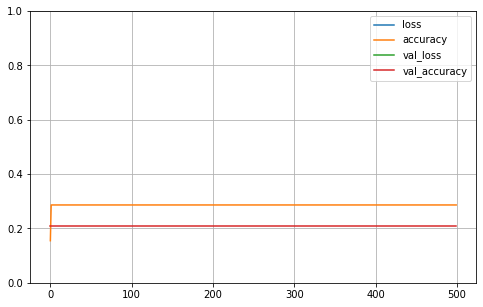

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Tentativa adicional utilizando função de MLP do scikit-learn

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=1000, solver='lbfgs',activation='logistic').fit(X_train, y_train)
print(clf.predict_proba(X_test[:1]))
print(clf.predict(X_test[0:1]))
print(y_test[0:1])
print(clf.score(X_test, y_test))

[[0.02014319 0.20899605 0.04569741 0.07041782 0.15943392 0.04602128
  0.09729364 0.11839858 0.05379669 0.00704858 0.01551895 0.01979304
  0.00661865 0.04565112 0.03298922 0.05218185]]
[1]
548    5
Name: classe, dtype: int64
0.20833333333333334


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## 3 - Segunda Abordagem
### Utilizando MLP:
#### Definir se choveu ou não em um dia com base na média diária dos atributos.

In [ ]:
# dados contém as médias diárias de todos atributos e o total diário de chuva
dados = medias(df2)
dados['Chuva (mm)'] = chuvas(df2)

In [ ]:
# Definindo classe binária
def chuva(df):
  cats = []
  for idx, i in df.iterrows():
    if i['Chuva (mm)'] > 0:
      cats.append(1)
    else:
      cats.append(0)
  return cats

names = ['não choveu','choveu']

In [ ]:
classes = chuva(dados)
dados = dados.drop(columns=['Chuva (mm)']).copy()
dados['classe'] = classes
dados

,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),classe
0,26.45,27.04,25.90,80.38,82.92,77.46,22.71,23.16,22.17,1005.32,1005.65,1005.01,1.51,53.96,5.42,1
1,26.04,26.52,25.44,81.83,84.04,79.75,22.61,23.05,22.11,1005.47,1005.71,1005.19,1.30,73.33,4.70,1
2,26.12,26.49,25.81,85.12,86.38,83.29,23.42,23.66,23.13,1006.12,1006.40,1005.84,1.19,71.79,4.18,1
3,27.32,27.74,26.78,80.25,82.67,77.67,23.50,23.88,23.03,1005.75,1006.00,1005.46,1.45,61.67,5.22,1
4,27.27,27.69,26.91,77.21,79.12,75.25,22.86,23.19,22.51,1006.21,1006.48,1005.98,1.49,53.38,5.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,25.56,26.00,25.15,83.29,85.54,81.46,22.46,22.96,22.19,1006.92,1007.18,1006.66,1.22,85.50,4.27,1
727,26.64,27.02,26.26,79.92,81.88,78.04,22.74,23.14,22.34,1007.91,1008.09,1007.65,1.25,96.46,4.71,1
728,26.39,26.87,25.82,78.50,81.08,76.46,22.25,22.74,21.80,1008.30,1008.56,1008.14,0.86,148.21,3.02,0
729,26.14,26.65,25.65,79.79,82.08,76.50,22.28,22.73,21.67,1005.96,1006.20,1005.79,1.08,97.04,4.18,1


In [ ]:
# Quantas instâncias de cada classe
frequencias(dados,'classe').sort_values(by=['classe'], ascending=False)

,classe,freq
0,1,418
1,0,313


In [ ]:
Y = dados['classe']
X = dados.drop(['classe'], axis=1).copy()
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [ ]:
r_regression(X,Y)

array([-0.48283963, -0.47540282, -0.4880446 ,  0.56371292,  0.59270214,
        0.53365006,  0.04920169,  0.06438841,  0.03447657,  0.28105581,
        0.28144341,  0.27914247,  0.23774665,  0.34316997,  0.28853625])

In [ ]:
# Dados de treinamento
X_train.shape

(657, 15)

In [ ]:
# Dados de teste
X_test.shape

(74, 15)

In [ ]:
print(names[y_train[0]])
y_train[0]

choveu


1

Resultado melhor do que com a classe categórica.

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=1000, solver='lbfgs',activation='logistic').fit(X_train, y_train)
print(clf.predict_proba(X_test[:1]))
print(clf.predict(X_test[0:1]))
print(y_test[0:1].to_string(index=False))
print(clf.score(X_test, y_test))

[[0.06782876 0.93217124]]
[1]
1
0.8648648648648649


In [ ]:
clf.get_params([True])

{'activation': 'logistic',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Tentativa no keras utilizando parâmetros próximos aos do scikit-learn.

Activation: logistic -> sigmoid

Hidden layers: 1 camada de 100 neurônios

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[15]))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
optimizer="nadam",
metrics=["accuracy"])

In [ ]:
earlystop = haltCallback(0.85)

history = model.fit(X_train, y_train, epochs=3000, validation_data=(X_test, y_test),callbacks=[earlystop])

Epoch 1/3000
21/21 [==============================] - 1s 13ms/step - loss: 0.7784 - accuracy: 0.4353 - val_loss: 0.7042 - val_accuracy: 0.3649
Epoch 2/3000
21/21 [==============================] - 0s 5ms/step - loss: 0.6856 - accuracy: 0.5677 - val_loss: 0.6649 - val_accuracy: 0.6351
Epoch 3/3000
21/21 [==============================] - 0s 5ms/step - loss: 0.6735 - accuracy: 0.5708 - val_loss: 0.6483 - val_accuracy: 0.6351
Epoch 4/3000
21/21 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.5647 - val_loss: 0.6455 - val_accuracy: 0.6351
Epoch 5/3000
21/21 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.5647 - val_loss: 0.6724 - val_accuracy: 0.6351
Epoch 6/3000
21/21 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.6301 - val_loss: 0.6413 - val_accuracy: 0.6351
Epoch 7/3000
21/21 [==============================] - 0s 4ms/step - loss: 0.6574 - accuracy: 0.5601 - val_loss: 0.6390 - val_accuracy: 0.6351
Epoch

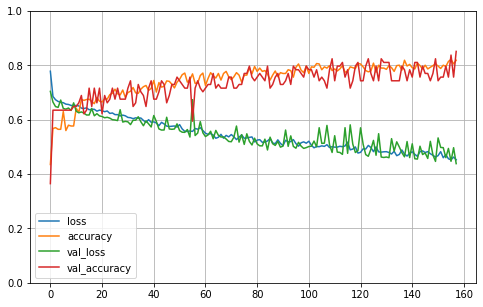

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4384 - accuracy: 0.8514


[0.43838056921958923, 0.8513513803482056]

### 4 - Terceira Abordagem
#### Utilizando os mesmos parâmetros da abordagem anterior
#### Definir a ocorrência de chuva com base nos dados orginais, i.e. por hora.

In [ ]:
classes = chuva(df2)
dados = df2.drop(columns=['Chuva (mm)']).copy()
dados = dados.drop(columns=['Data']).copy()
dados['classe'] = classes
dados

,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),classe
0,25.9,26.4,25.9,79.0,79.0,73.0,22.1,22.1,21.1,1006.3,1006.3,1005.9,1.4,52.0,5.0,0
1,26.0,26.1,25.9,81.0,81.0,79.0,22.4,22.4,22.1,1007.0,1007.0,1006.3,1.7,54.0,4.8,0
2,26.0,26.1,25.9,82.0,82.0,80.0,22.7,22.8,22.4,1006.9,1007.2,1006.9,1.3,38.0,4.8,0
3,25.7,26.0,25.7,85.0,85.0,82.0,22.9,22.9,22.7,1006.3,1006.9,1006.3,1.0,40.0,4.0,0
4,25.7,25.8,25.6,86.0,86.0,85.0,23.1,23.2,22.9,1005.2,1006.3,1005.2,1.4,34.0,3.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,28.9,29.5,28.8,65.0,66.0,62.0,21.6,22.0,21.2,1003.1,1003.4,1003.0,1.7,79.0,7.8,0
17540,27.6,29.0,27.6,67.0,67.0,63.0,21.0,21.8,20.4,1003.3,1003.3,1003.0,1.4,56.0,6.4,0
17541,26.9,27.6,26.9,68.0,68.0,65.0,20.5,20.8,20.3,1003.8,1003.8,1003.3,1.9,57.0,7.8,0
17542,26.4,26.9,26.4,75.0,75.0,68.0,21.5,21.5,20.5,1004.9,1004.9,1003.8,1.5,62.0,6.1,0


In [ ]:
# Quantas instâncias de cada classe
frequencias(dados,'classe').sort_values(by=['classe'], ascending=False)

,classe,freq
1,1,1958
0,0,15586


In [ ]:
# Balanceando dados
zeros = dados[dados['classe'] == 0]
ums = dados[dados['classe'] == 1]
zeros = zeros.sample(n=ums.shape[0], random_state=0)
dados = pd.concat([zeros,ums])
dados

,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),classe
6189,24.4,24.6,24.2,82.0,82.0,80.0,21.0,21.2,20.7,1012.5,1012.5,1012.2,1.7,150.0,4.5,0
5988,26.1,26.1,24.3,77.0,86.0,76.0,21.7,22.2,21.2,1011.9,1012.0,1011.6,1.1,130.0,5.0,0
4299,23.1,23.3,23.0,81.0,88.0,81.0,19.6,21.0,19.6,1010.0,1010.2,1010.0,1.8,200.0,4.7,0
16260,27.4,27.5,26.9,82.0,82.0,77.0,24.1,24.1,22.9,1008.4,1008.4,1008.2,1.4,199.0,3.4,0
4339,25.1,26.1,25.1,82.0,82.0,77.0,21.8,22.2,21.5,1010.0,1010.0,1009.9,3.3,176.0,8.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17462,29.5,29.8,29.0,66.0,68.0,65.0,22.5,23.2,22.0,1008.9,1009.3,1008.9,1.8,66.0,6.3,1
17505,23.6,24.8,23.5,89.0,89.0,84.0,21.8,22.3,21.2,1006.8,1006.8,1006.1,0.8,47.0,2.8,1
17506,23.8,24.0,23.6,93.0,93.0,89.0,22.5,22.6,21.8,1007.3,1007.3,1006.8,0.5,70.0,3.0,1
17507,26.3,26.3,23.6,92.0,93.0,90.0,24.8,24.8,22.3,1007.3,1007.4,1007.2,0.5,334.0,2.7,1


In [ ]:
Y = dados['classe']
X = dados.drop(['classe'], axis=1).copy()
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
r_regression(X,Y)

array([-0.51305656, -0.43059993, -0.54243247,  0.6443017 ,  0.65148645,
        0.54706689,  0.1199183 ,  0.11982123,  0.07105389,  0.20598359,
        0.21155389,  0.20039294,  0.08437875,  0.16170968,  0.2193623 ])

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=1000, solver='lbfgs',activation='logistic').fit(X_train, y_train)
print(clf.predict_proba(X_test[:1]))
print(clf.predict(X_test[0:1]))
print(y_test[0:1].to_string(index=False))
print(clf.score(X_test, y_test))

[[0.1148649 0.8851351]]
[1]
1
0.8954081632653061


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[15]))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
optimizer="nadam",
metrics=["accuracy"])

In [ ]:
earlystop = haltCallback(0.9)

history = model.fit(X_train, y_train, epochs=3000, validation_data=(X_test, y_test),callbacks=[earlystop])

Epoch 1/3000
111/111 [==============================] - 1s 4ms/step - loss: 0.6820 - accuracy: 0.5928 - val_loss: 0.6756 - val_accuracy: 0.6403
Epoch 2/3000
111/111 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.6121 - val_loss: 0.6620 - val_accuracy: 0.6735
Epoch 3/3000
111/111 [==============================] - 0s 3ms/step - loss: 0.6625 - accuracy: 0.6544 - val_loss: 0.6529 - val_accuracy: 0.5816
Epoch 4/3000
111/111 [==============================] - 0s 3ms/step - loss: 0.6401 - accuracy: 0.6728 - val_loss: 0.6648 - val_accuracy: 0.5485
Epoch 5/3000
111/111 [==============================] - 0s 3ms/step - loss: 0.5970 - accuracy: 0.7352 - val_loss: 0.7440 - val_accuracy: 0.5026
Epoch 6/3000
111/111 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.7165 - val_loss: 0.6307 - val_accuracy: 0.7730
Epoch 7/3000
111/111 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7670 - val_loss: 0.6653 - val_accuracy:

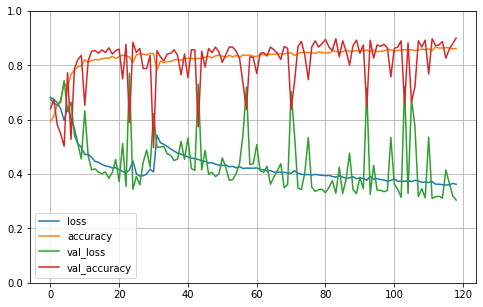

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.9005


[0.3041781485080719, 0.9005101919174194]

In [ ]:
# pesos da camada de Saída
weights, biases = model.layers[2].get_weights()
print(weights.shape)
print(weights)

(100, 1)
[[-0.21784364]
 [-0.15148836]
 [ 0.32948178]
 [-0.2372718 ]
 [-0.16513318]
 [ 0.04607016]
 [ 0.34095287]
 [ 0.15434371]
 [-0.16409504]
 [ 0.17704016]
 [-0.1904164 ]
 [ 0.28362137]
 [ 0.22506098]
 [-0.14321394]
 [-0.0110625 ]
 [ 0.2458166 ]
 [-4.4643483 ]
 [ 0.0225862 ]
 [-0.128827  ]
 [ 0.17834704]
 [ 0.02588993]
 [-0.14979076]
 [-0.10566306]
 [ 0.05316583]
 [-0.20282729]
 [-0.13875866]
 [ 0.04784121]
 [ 0.15857983]
 [ 0.08907665]
 [ 1.2310493 ]
 [-0.13183485]
 [ 0.07154518]
 [ 0.00744395]
 [ 0.240684  ]
 [ 0.19187585]
 [-0.00643732]
 [ 0.20610276]
 [ 0.278884  ]
 [-0.13812618]
 [ 0.27145666]
 [-0.13497724]
 [-0.2388735 ]
 [-0.14182107]
 [ 0.22819127]
 [ 0.11774129]
 [ 0.06051643]
 [-0.09646127]
 [ 0.21586616]
 [ 0.30957234]
 [-0.0885534 ]
 [-0.06129497]
 [ 0.1590666 ]
 [-0.11722287]
 [-0.02337121]
 [ 0.21372756]
 [-0.13274398]
 [ 0.16657275]
 [-0.04328097]
 [-0.02088319]
 [-0.06793128]
 [-0.22928439]
 [ 0.1799918 ]
 [ 0.20029762]
 [-0.01307204]
 [ 0.10821691]
 [ 0.16640498]
 